In [ ]:
#Description: This programme uses LSTM 
#Use LSTM to predict closing stock price of a corporation (Apple Inc.) using the past 60 day stock price

In [53]:
#Import Libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [54]:
#Get the stock quote

df = web.DataReader('FB', data_source='yahoo', start='2013-01-01', end='2020-12-14')

#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,26.990000,26.110001,26.200001,26.620001,60374500,26.620001
2013-01-02,28.180000,27.420000,27.440001,28.000000,69846400,28.000000
2013-01-03,28.469999,27.590000,27.879999,27.770000,63140600,27.770000
2013-01-04,28.930000,27.830000,28.010000,28.760000,72715400,28.760000
2013-01-07,29.790001,28.650000,28.690001,29.420000,83781800,29.420000
...,...,...,...,...,...,...
2020-12-08,286.429993,281.549988,286.010010,283.399994,10747700,283.399994
2020-12-09,287.630005,271.750000,283.660004,277.920013,25189700,277.920013
2020-12-10,278.730011,271.859985,275.540009,277.119995,20065100,277.119995


In [55]:
#Get the number of rows and columns in the data set

df.shape

(2004, 6)

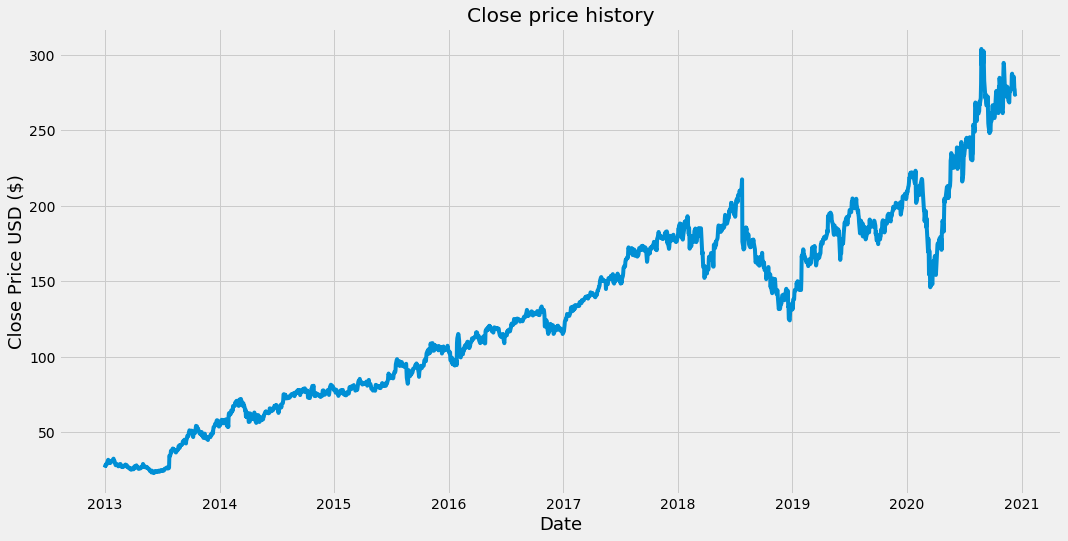

In [56]:
#Visualise the closing price history
plt.figure(figsize = (16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [57]:
#Create a new dataframe with only the 'Close' column

data = df.filter(['Close'])

#Convert the dataframe to a numpy array

dataset = data.values

#Get the number of rows to train the LSTM model on

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len


1604

In [58]:
#Scale the data

scaler = MinMaxScaler(feature_range = (0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01323797],
       [0.01814882],
       [0.01733035],
       ...,
       [0.90466529],
       [0.89196109],
       [0.89423864]])

In [59]:
#Create the training data set

#Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01323797, 0.01814882, 0.01733035, 0.02085335, 0.02320202,
       0.02192093, 0.02736558, 0.02989217, 0.03138678, 0.02864667,
       0.02562187, 0.02473222, 0.02576421, 0.02405608, 0.02786378,
       0.02818405, 0.02910929, 0.03074624, 0.03405573, 0.0280773 ,
       0.02967866, 0.02875342, 0.02430518, 0.01854027, 0.02042632,
       0.02188534, 0.0204619 , 0.02010604, 0.01907406, 0.01590691,
       0.01782855, 0.01992812, 0.01928757, 0.02145831, 0.01978577,
       0.01558664, 0.01505284, 0.01555105, 0.01597808, 0.01412762,
       0.01547988, 0.01736593, 0.01715241, 0.0164407 , 0.0161916 ,
       0.0202128 , 0.01800647, 0.01864702, 0.01754386, 0.01487492,
       0.01473258, 0.01334472, 0.01277535, 0.01298886, 0.01053344,
       0.0101064 , 0.01007082, 0.00793566, 0.00822035, 0.01135191])]
[0.009537028100822229]

[array([0.01323797, 0.01814882, 0.01733035, 0.02085335, 0.02320202,
       0.02192093, 0.02736558, 0.02989217, 0.03138678, 0.02864667,
       0.02562187, 0.02473222, 0.0

In [60]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(1544, 60, 1)

In [62]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [63]:
#Compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [64]:
#Train the model

model.fit(x_train, y_train, batch_size = 1,  epochs=1)

1544/1544 [==============================] - 112s 69ms/step - loss: 0.0016


In [65]:
#Create the testing data set

#Create a new array containing scaled values

test_data = scaled_data[training_data_len-60:, :]

#Create the datasets x_test and y_test

x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [66]:
#Convert the data to a numpy array

x_test = np.array(x_test)

In [67]:
#Reshape the data to 3 dimensional since that is what LSTM requires

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [68]:
#Get the model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [74]:
#Get the root mean squared error (RMSE)

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

9.417952640655535

C:\Users\Soorya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


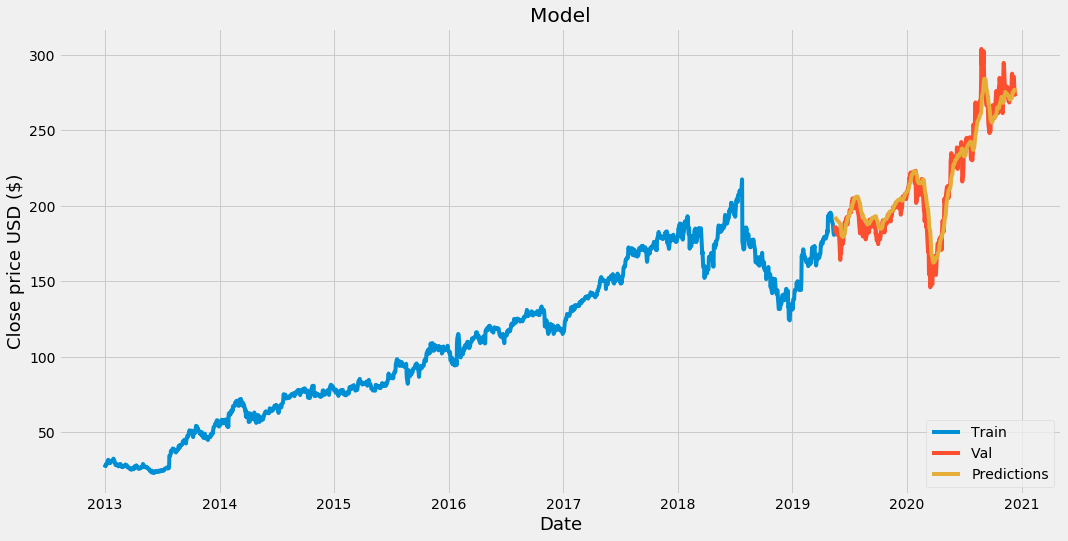

In [75]:
#Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualise

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')
plt.show()

In [76]:
#Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2019-05-16,186.990005,192.571487
2019-05-17,185.300003,192.192780
2019-05-20,182.720001,191.850189
2019-05-21,184.820007,191.326920
2019-05-22,185.320007,190.984329
...,...,...
2020-12-08,283.399994,276.376434
2020-12-09,277.920013,276.902802
2020-12-10,277.119995,276.774933


In [88]:
#Get the quote
fb_quote = web.DataReader('FB', data_source = 'yahoo', start = '2013-01-01', end='2020-12-15')

#Create a new dataframe

new_df = fb_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array

last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list

X_test = []

#Append the past 60 days

X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array

X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price

pred_price = model.predict(X_test)

#Undo the scaling

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[274.02115]]


In [78]:
fb_quote2 = web.DataReader('FB', data_source = 'yahoo', start = '2020-12-15', end='2020-12-15')

print(fb_quote2['Close'])

Date
2020-12-14    274.190002
2020-12-15    275.549988
Name: Close, dtype: float64
